# K - 최근접 이웃 회귀 알고리즘

## k-최근접 이웃 회귀
- 회귀(regression) : 특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다. 예측문제 중에서 출력변수의 값이 연속적인 문제를 회귀(regression) 또는 회귀분석(regression analysis)라고 부른다
- KNN Regression(K-최근접 이웃 회귀)알고리즘 : 주변의 가장 가까운 K개의 샘플을 통해 값을 예측하는 방식으로 가장 간단한 방식으로는 K개 샘플의 평균을 이용할 수 있다

### 생선 무게 예측

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 분류 및 예측을 위한 모델
1. Model_based Learning(모델 기반 학습)
 - 데이터로부터 모델을 생성하여 분류/예측을 진행한다
 - 선형/비선형 모델(linear regression, logistic regression)
 - Neural Network
 - 의사결정나무(decision tree)
 - SVM(support vector machine)
2. Instance_based Learning(사례 기반 학습)
 - 별도의 모델 생성없이 데이터베이스에 있는 자료들을 분류/예측에 사용한다
 - 각각의 관측치만을 이용하여 새로운 데이터에 대한 예측을 진행한다
 - 대표적인 알고리즘은 knn 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

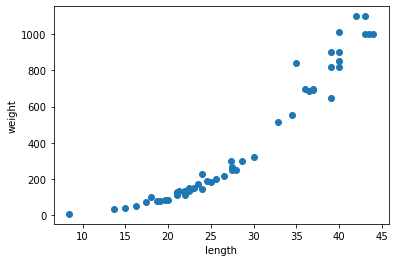

In [3]:
# 데이터 특성을 파악하기 위한 산점도 그래프
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 두 관측값에 관련성이 잇음을 확인 => 회귀분석 사용가능

## 훈련 데이터셋과 테스트 데이터셋으로 분리

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)
# 책 98-99p
# 이것만 보고도 길이(perch_length)를 학습 -> 무게(perch_weight)를 예측
# feature=2차원 target=2차원이 돼야함

In [10]:
a = np.array([1, 2, 3, 4])
a.shape
# 1차원이 나옴. 2차원으로 만드려면

(4,)

In [11]:
a = a.reshape(2, 2)
# reshape할때 데이터 갯수가 맞아야 됨
a.shape
# 2차원으로 바뀜

(2, 2)

In [12]:
a = a.reshape(2, -1)
# 이렇게 음수가 들어가면 무시하겟지(계산하기 힘들때)
# 근데 행이 2개면 어차피 열도 2개가 되니까 2차원을 만들라는 뜻
a.shape

(2, 2)

In [13]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
# 둘 다 2차원이어야 됨
# 행열 모두 계산하기 힘들때 음수넣어주면 하나에 맞춰서 알아서 나옴

In [14]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [15]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

### Machine Learning Package Version List

In [17]:
import sys
print('Python version : ', sys.version)
# python버전만 낮춰도 어떤 파라미터를 썼는지가 다 뜬다.

Python version :  3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [18]:
print('pandas version : ', pd.__version__)

pandas version :  1.3.4


In [19]:
print('numpy version : ', np.__version__)

numpy version :  1.20.3


In [20]:
import matplotlib
print('matplotlib version : ', matplotlib.__version__)

matplotlib version :  3.4.3


In [21]:
import scipy as sp
print('scipy version : ', sp.__version__)

scipy version :  1.7.1


In [22]:
import IPython
print('IPython version : ', IPython.__version__)

IPython version :  7.29.0


In [23]:
import sklearn
print('scikit-learn version : ', sklearn.__version__)

scikit-learn version :  0.24.2


In [24]:
# 정확도 : 정답을 맞춘 개수의 비율
knr.score(test_input, test_target)
# 임의대로 만든 숫자이기때문에 완전히 정확할수는 없지만 최대한
# 나쁘지않음
# 하지만 좀 더 실제값과 예측값의 차이가 얼마나 되는지 알고싶음

0.992809406101064

In [25]:
# 정확도보다 결정계수라는 표현을 쓴다
# 결정계수(R2) = 1 - (타깃 - 예측)2의 합 / (타깃 - 평균)2의 합  
from sklearn.metrics import mean_absolute_error
# MAE : 타깃과 예측의 절대값 오차를 평균하여 반환
# 테스트 데이터의 예측
test_predict = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_predict)
mae
# 평균 19gram 정도의 차이가 난다
# == 생선의 무게가 실제값과 19gram정도 차이난다

19.157142857142862

In [26]:
# 훈련 데이터의 정확도도 측정
knr.score(train_input, train_target)
# 96% 나옴
# 테스트 데이터는 99%인데 훈련 데이터는 96% == 왜 살짝 낮을까
# 과소적합을 의심해봄

0.9698823289099254

## 과대적합 vs 과소적합

- 과대적합(Overfitting) : 훈련 세트(데이터)에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁠 때
- 과소적합(Underfitting) : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 너무 낮을 경우    
- 일반적으로 과대적합/과소접합이 일어나는 이유 중 하나는 데이터셋의 크기가 매우 작기때문이다

- 테스트의 결정계수가 훈련의 결정계수보다 점수가 높아서 과소적합을 의심할 수 있다
- 과소적합을 해결하는 일반적인 방법은 모델을 조금 더 복잡하게 만드는 것이다
- k-최근접 이웃의 모델을 복잡하게 만드는 방법은 이웃수 k의 값을 낮추는 것이다
- k 값을 따로 주지 않으면 기본값이 5

In [28]:
# default = 5
knr.n_neighbors = 3

# 모델 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target)
# 훈련 점수 아까 96 이었는데 살짝 오른 98

0.9804899950518966

In [29]:
knr.score(test_input, test_target)
# 테스트 점수는 살짝 낮아진 97
# 과소적합은 해소됨
# 두 점수 차이가 크지 않으므로 과대적합도 아님
# 이 모델은 좋은 모델임

0.9746459963987609

In [30]:
# knn은 모든 데이터를 갖고 시작하기 때문에 새로운 데이터는 예측이 떨어지는 단점이 있음
